In [100]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [101]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [102]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [103]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [104]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

/var/folders/vf/5t0z3x6j7z14ggb8h84tgcsc0000gn/T/ipykernel_8498/1088473682.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine,reflect=True)


In [105]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [106]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [107]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [108]:
# Find the most recent date in the data set.
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print (f"The most recent date is:{latest_date}")

The most recent date is:('2017-08-23',)


In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017,8, 23)

# Calculate the date one year from the last date in data set.
last_year=latest_date-dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
precip= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=last_year).all()



# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_dataf = pd.DataFrame(precip,columns=['date', 'prcp']).rename(columns={"prcp":"precipitation"})


# Sort the dataframe by date
precip_dataf=precip_dataf.dropna()# To drop missing values
precip_dataf = precip_dataf.set_index('date')
precip_dataf = precip_dataf.sort_values('date')
precip_dataf.head()



,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


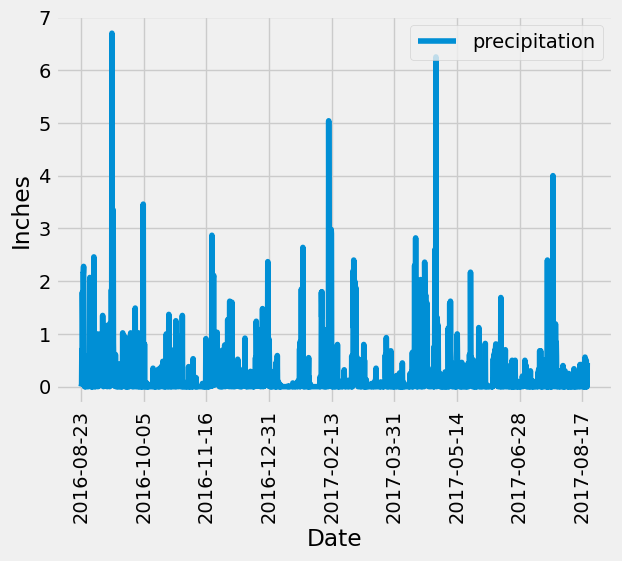

<Figure size 640x480 with 0 Axes>

In [110]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_dataf.plot(rot=90)
plt.legend(loc = 'upper right')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()
plt.savefig("./Images/Fig_1") # To save the plot as an image


In [111]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_dataf.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [112]:
# Design a query to calculate the total number of stations in the dataset
# ns stands for "number of stations"
ns=session.query(Station.id).count()
print(f"The number of Stations is: {ns}")


The number of Stations is: 9


In [113]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
os= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
os # os stands for "Ordered Stations"

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [114]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# The most active station is "USC00519281".
most_active_measures = [Measurement.station, 
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
most_active_query= session.query(*most_active_measures).filter_by(station = "USC00519281").all()

print(f"The lowest temperature is {most_active_query[0][1]}")
print(f"The highest temperature for is {most_active_query[0][2]}")
print(f"The average temperature for is {most_active_query[0][3]}")

The lowest temperature is 54.0
The highest temperature for is 85.0
The average temperature for is 71.66378066378067


In [115]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_data= session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date >= last_year).all()

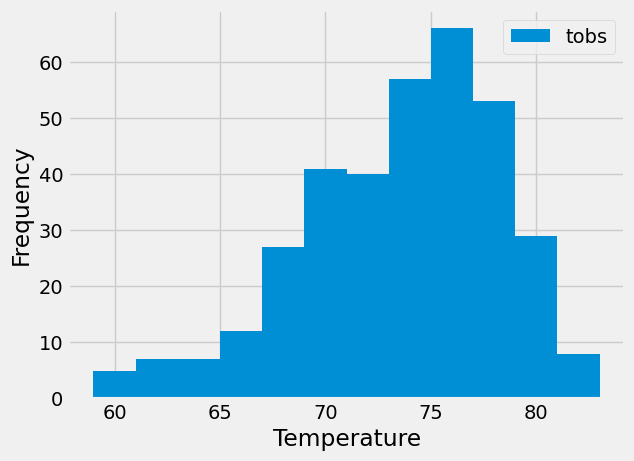

In [116]:
last_year_df = pd.DataFrame(last_year_data)

# Create the histogram 
last_year_df.plot(kind = "hist", bins = 12)
plt.xlabel('Temperature')
plt.savefig("./Images/Fig_2") # To save the plot as an image



# Close Session

In [117]:
# Close Session
session.close()